In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

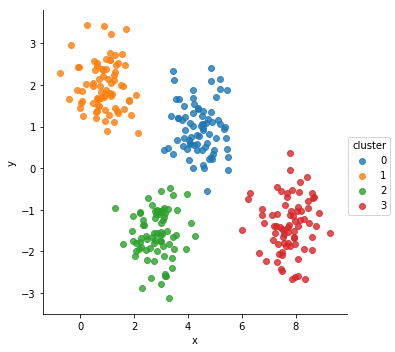

In [18]:
# First we take a look at the clustering of the dataset
df = pd.read_csv("cdata.csv")
df.head()
sns.lmplot(x="x",y="y",fit_reg=False,hue="cluster",data=df)

In [19]:
#randomly select k points from minimum to maximum
D = np.array(df.iloc[:,:-1])
space = np.vstack((D.min(0),D.max(0)))
rang = space[1] - space[0]
def startpoint(k=4):
    #Create a list of initial centroid points of size k
    for i in range(k):
        yield np.random.random((2,))*rang + space[0]
startpts= startpoint()
list(startpts)

[array([ 3.50268258, -1.7910824 ]),
 array([ 3.8630722 , -2.22430637]),
 array([3.67852071, 2.85920228]),
 array([2.26349173, 0.21090321])]

In [20]:
def distance(a,b):
    #Calculate the distance between a and b 
    return  np.sqrt(sum((a-b)**2)) 
def get_centroid_point(x):
    #find the centroid point of a list
    x = np.array(x)
    return  np.mean(x)

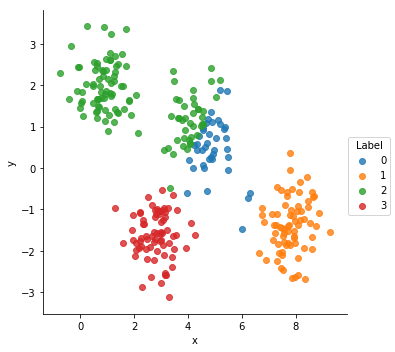

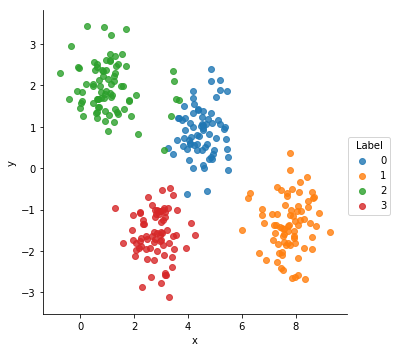

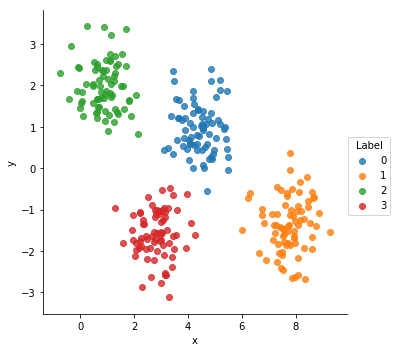

In [21]:
#read data
df = pd.read_csv("cdata.csv")
clus = df[["x","y"]]

def kmeans(data,k = 4):
    
    #first we set the label unknown because it's a unsupervise problem
    data["Label"]=None
    
    #randomly select k points from the data 
    startpts = df.iloc[:,:-1].values
    np.random.shuffle(startpts)
    startpts = startpts[:k]
    
    labels= list(range(k))
    
    while True:
        sse = 0
        for i,v in data.iloc[:,:-1].iterrows():
            features = v.values
            #create a dictionay to gey the distance with three centroids dots
            dist = dict()
            for central,lbl in zip(startpts,labels):
                dist[lbl] = distance(features,central)
            #find the label of shortest distance 
            min_distance_lbl = pd.Series(dist).idxmin()
            sse += pd.Series(dist).min()
            data.ix[i,"Label"] = min_distance_lbl
        means = data.groupby("Label").mean().values
        if np.array_equal(means,startpts):
            break
        else: startpts = means
        meanplot =  pd.DataFrame(means,columns=["x","y"]) 
        #ploting
        sns.lmplot(x="x",y="y",fit_reg=False,hue="Label",data=data)
kmeans(clus,4)

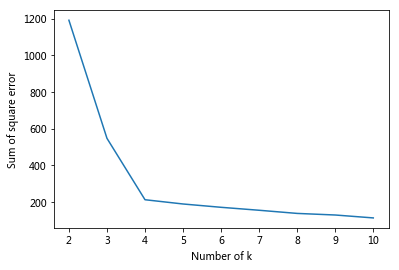

In [9]:
df = pd.read_csv("cdata.csv")
features = df[["x","y"]].values
#elbow method
SSE = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='random')
    kmeans.fit(features)
    SSE.append(kmeans.inertia_)
plt.plot(range(2,11),SSE)
plt.xlabel("Number of k")
plt.ylabel("Sum of square error")
plt.savefig("elbow",dpi=500)

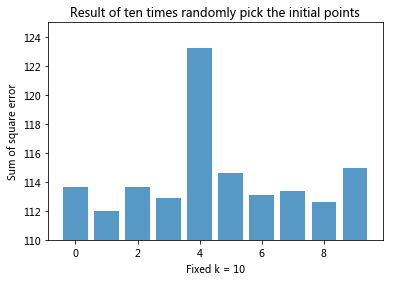

In [10]:
# ten times
SSE = []
for i in range(10):
    kmeans = KMeans(n_clusters=10,init='random')
    kmeans.fit(features)
    SSE.append(kmeans.inertia_)
plt.bar(range(10),SSE,alpha=.75)
plt.xlabel("Fixed k = 10")
plt.ylabel("Sum of square error")
plt.title("Result of ten times randomly pick the initial points")
plt.ylim(110,125)
plt.savefig("ten",dpi=500)